## Deadline + Late Penalty

**Note :** It will take you quite some time to complete this project, therefore, we earnestly recommend that you start working as early as possible.


* Submission deadline for the Project is **20:59:59 on 23rd Apr, 2021 (Sydney Time)**.
* **LATE PENALTY: Late Penalty: 10-% on day-1 and 20% on each subsequent day.**

## Instructions
1. This note book contains instructions for **COMP9318-Project**.

2. You are required to complete your implementation in a file `submission.py` provided along with this notebook.

3. You are not allowed to print out unnecessary stuff. We will not consider any output printed out on the screen. All results should be returned in appropriate data structures via corresponding functions.

4. You can submit your implementation for the **Project** via following link: http://kg.cse.unsw.edu.au/submit/

5. For each part, we have provided you with detailed instructions. In case of any problem, you can post your query @ Ed.

6. You are allowed to add other functions (you may have to for this project), but you are not allowed to define global variables. **Only functions are allowed** in `submission.py`.

7. You are allowed to import other modules, but only from the following modules/libraries.
 * **Scikit-Learn 0.24.1**
 * **Numpy 1.19.5**
 * **Pandas 1.1.5**
 * **Python 3.6.5**

 Importing other modules will lead to errors.

8. For some parts of the project, i.e., **Project-Part1**, we will provide immediate feedback on your submission **based on the dataset provided with the specs (1st April 2021 onwards)**. You can view the feedback using the online submission portal on the same day.

9. You are allowed a limited number of Feedback Attempts **(15 Attempts for each Student)**, we will use your **LAST** submission for Final Evaluation. Please **DO NOT** forget to submit **Report.pdf** along with your last submission.

## Project-Part1: Predict COVID-19 Confirmed Cases (45 Points)

Given the fact that the world is exposed to COVID-19, in this project, we aim to analyze the time series of COVID-19 cases as a function of past COVID-19 cases and the weather conditions.

In this question, you are required to formulate a model that can predict confirmed COVID-19 cases for a state $X$ by analyzing the time series data of the COVID-19 cases along with the weather conditions. Specifically, you are required to complete the function `predict_COVID_part1()` in the file `submission.py`. The inputs and the outputs of the function are explained as follows:

## Input and Output formats

### Inputs:

1. `svm_model`, Scikit-learn's Support Vector Regression model with hyper-parameters initialized. **Note** that for part1 of the project, you are not required to change the model and its hyper-parameters, we recommend using the hyper-parameters settings provided as model input. 

* `train_df`, pandas dataframe corresponding the csv file: `COVID_train_data.csv`. The format of all fields of the data set is explained below. This dataset is intended for model training.

* `train_labels_df`, pandas dataframe corresponding to the csv file: `COVID_train_labels.csv`. It comprises the number of COVID-19 confirmed cases for each single day. This dataset is intended for model training.

* `past_cases_interval`, an integer value representing number of past days of COVID-19 cases to consider for the model training.

* `past_weather_interval`, an integer value representing the number of past days of weather conditions to consider for the model training.

* `test_feature`, A feature vector encompassing a subset of features from the file `test_features.csv` used for predicting the COVID-19 cases of the future. We provide details of the file: `test_features.csv` in the following section.

### Outputs:

Based on the feature space used for the model training (i.e., features constructed from the `train_data`), you are required to select the corresponding subset of features from the test features `test_features.csv` and predict the probable cases of COVID-19 cases for each single day.

**NOTE: You should use math.floor(x) to convert the prediction result to an integer.**

### Data Format Explained

#### 1. `train_df:`

The `train_df` dataframe encompasses time series data of weather conditions and COVID-19 cases for the state $X$ in the increasing order of time. The contents of the dataframe are explained below:

1. **day**: The day number of each observation in the file `train_df`. The day numbers are increasing in order of time.

* **temp**: Temperature of state $X$ in $^{\circ}F$. We provide $maximum$, $average$ and $minimum$ temperature of state $X$ in the fields `max_temp`, `avg_temp` and `min_temp` respectively.

* **dew**: Dew point of state $X$ in $^{\circ}F$. We provide $maximum$, $average$ and $minimum$ dew point of state $X$ in the fields `max_dew`, `avg_dew` and `min_dew` respectively.

* **humid**: % Humidity of state $X$. We provide $maximum$, $average$ and $minimum$ humidity of state $X$ in the fields `max_humid`, `avg_humid` and `min_humid` respectively.

* **wind_speed**: Wind speed in state $X$ measured in mph. We provide $maximum$, $average$ and $minimum$ wind speed  of state $X$ in the fields `max_wind_speed`, `avg_wind_speed` and `min_wind_speed` respectively.

* **pressure**: Sea level pressure of state $X$ measured in $Hg$. We provide $maximum$, $average$ and $minimum$ sea level pressure of state $X$ in the fields `max_pressure`, `avg_pressure` and `min_pressure` respectively.

* **precipitation**: Total dailly Precipitation of state $X$ measured in inches, represented as variable `precipitation`.

* **dailly_cases**: Total number of confirmed COVID-19 cases for state $X$ reported each single day.


#### 2. `train_labels_df:`

The `train_labels_df` encompasses the number of COVID-19 confirmed cases of state $X$ being reported every single day. The contents of this file are shown below.

1. **day**: The day number of each observation in the file `train_labels_df`. The day numbers are increasing in order of time.

* **dailly_cases**: Total number of confirmed COVID-19 cases for state $X$ reported each single day.


#### 3. `test_features.csv:`

The `test_features.csv` encompasses all possible feature values of the test features, encompassing the weather conditions and the past COVID-19 cases for the past `N-days (N=30)`. For a given day, the corresponding day-id is added along with the feature name. For this project, you are allowed to use all the features and/or a subset of it as per your requirement.


**Note:** 

* We restrict the maximum allowed values of the features from the past (weather and COVID-19 cases) to `N=30` days.
* The features in the file `test_features.csv` will follow the same sequential order unless specified otherwise.

## How to construct feature matrix
Given the fact that we restrict the value of the past instances of weather and past cases to be: `N=30`. If we construct a feature matrix of all the parameters involved in the training data, our initial feature matrix will be of the shape: `162 x 510`. In this project we require you to formulate the COVID-19 cases prediction as a regression problem. 
Specifically, you will be using the information for the `days: 1,...,t-1` to predict the cases for the `day = t`, as shown in a simple linear regression model below, for illustration purposes only:


<center>$\sum_{i=1}^{t-1}a_{i}*max\_temp_{i} +...+ \sum_{i=1}^{t-1}p_{i}*precipitation_{i} + \sum_{i=1}^{t-1}q_{i}*Cases_{i}= Cases_{day = t}$</center>

### Training Feature Matrix:

For the project-part1, we require you to form a feature matrix (`x_train`) encompassing the maximum values of the following subset of weather information and the past cases, in the same order as mentioned below: 

`[max_temp, max_dew, max_humid, past_cases]`

For the values of the input parameters: `past_weather_interval=10` and `past_cases_interval=10`, the resulting training matrix formed using the training data file: `train_df`, and the features mentioned above (i.e., `[max_temp, max_dew, max_humid, past_cases]`), the training matrix will be of the shape: `162x40`

## How to run your implementation Project-Part1 (Example)

In [36]:
import math

totalValues = 4
PositiveValues = 3
NegativeValues = totalValues - PositiveValues
multiplyVal = 4/14
result1 = -multiplyVal*((PositiveValues/totalValues)*math.log((PositiveValues/totalValues), 2) + (NegativeValues/totalValues)*math.log((NegativeValues/totalValues), 2))

result1

0.23179374984546652

In [26]:
totalValues2 = 4
PositiveValues2 = 2
NegativeValues2 = totalValues2 - PositiveValues2
multiplyVal2 = 1

result2 = -multiplyVal2*((PositiveValues2/totalValues2)*math.log((PositiveValues2/totalValues2), 2) + (NegativeValues2/totalValues2)*math.log((NegativeValues2/totalValues2), 2))

result2

1.0

In [27]:
multiplyValue1 = totalValues/(totalValues + totalValues2)
multiplyValue2 = 1 - multiplyValue1

result = multiplyValue1*result1 + multiplyValue2*result2

result

In [32]:
(9/14)*math.log(9/14, 2)

-0.40977637753840185

In [1]:
import submission
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

## Parameters settings
past_cases_interval = 10
past_weather_interval = 10


## Read training data
train_file = './data/COVID_train_data.csv'
train_df = pd.read_csv(train_file)

## Read Training labels
train_label_file = './data/COVID_train_labels.csv'
train_labels_df = pd.read_csv(train_label_file)


## Read testing Features
test_fea_file = './data/test_features.csv'
test_features = pd.read_csv(test_fea_file)


## Set hyper-parameters for the SVM Model

train_df.head()

<AxesSubplot:xlabel='day'>

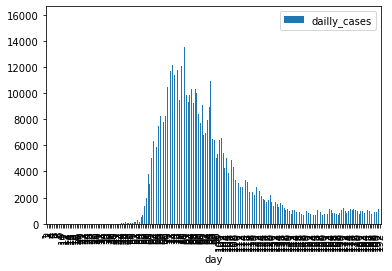

In [508]:
train_df.plot(x='day', y='dailly_cases', kind='bar')

In [3]:
df2 = train_df

In [615]:
df3 = train_df[138:]

<AxesSubplot:xlabel='day'>

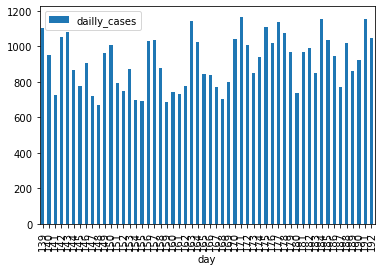

In [616]:
df3.plot(x='day', y='dailly_cases', kind='bar')

In [41]:
df2[(df2 >= 0).all(1)]

,dailly_cases,dailly_cases-1,dailly_cases-2,dailly_cases-3,dailly_cases-4,dailly_cases-5,dailly_cases-6,dailly_cases-7,dailly_cases-8,dailly_cases-9,dailly_cases-10,dailly_cases-11,dailly_cases-12,dailly_cases-13,dailly_cases-14,dailly_cases-15,dailly_cases-16
50,109,86.0,28.0,38.0,48.0,96.0,17.0,19.0,11.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
51,144,109.0,86.0,28.0,38.0,48.0,96.0,17.0,19.0,11.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
52,251,144.0,109.0,86.0,28.0,38.0,48.0,96.0,17.0,19.0,11.0,2.0,0.0,1.0,0.0,0.0,0.0
53,144,251.0,144.0,109.0,86.0,28.0,38.0,48.0,96.0,17.0,19.0,11.0,2.0,0.0,1.0,0.0,0.0
54,477,144.0,251.0,144.0,109.0,86.0,28.0,38.0,48.0,96.0,17.0,19.0,11.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1020,771.0,944.0,1032.0,1155.0,846.0,991.0,967.0,738.0,964.0,1072.0,1136.0,1020.0,1110.0,937.0,849.0,1004.0
188,861,1020.0,771.0,944.0,1032.0,1155.0,846.0,991.0,967.0,738.0,964.0,1072.0,1136.0,1020.0,1110.0,937.0,849.0
189,923,861.0,1020.0,771.0,944.0,1032.0,1155.0,846.0,991.0,967.0,738.0,964.0,1072.0,1136.0,1020.0,1110.0,937.0
190,1151,923.0,861.0,1020.0,771.0,944.0,1032.0,1155.0,846.0,991.0,967.0,738.0,964.0,1072.0,1136.0,1020.0,1110.0


In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

xTrain = df2[(df2 >= 0).all(1)]
yTrain = train_labels_df
yTrain = yTrain.drop(['day'], 1)
yTrain = yTrain.drop(labels=[23,24,30,45], axis=0)

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(xTrain,yTrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xTrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
 

ValueError: Found input variables with inconsistent numbers of samples: [142, 188]

<ipython-input-433-c36bbc460f71>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xTrain,yTrain)


[0.09881425 0.06234432 0.061897   0.05881031 0.05217573 0.05764154
 0.05643896 0.0430783  0.04906545 0.05124666 0.05189234 0.05062967
 0.04004707 0.04151318 0.04779347 0.04042185 0.03787924 0.09831066]


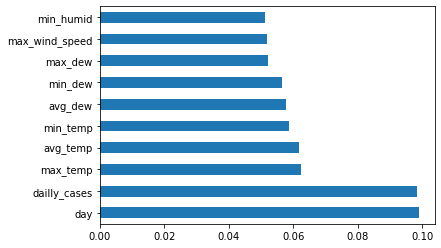

In [433]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(xTrain,yTrain)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=xTrain.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [199]:
x_train = df2.drop(['max_temp', 'max_dew', 'max_humid', 'dailly_cases'], 1)
x_train.head()

,max_temp-1,max_temp-2,max_temp-3,max_temp-4,max_temp-5,max_temp-6,max_temp-7,max_temp-8,max_temp-9,max_temp-10,...,dailly_cases-1,dailly_cases-2,dailly_cases-3,dailly_cases-4,dailly_cases-5,dailly_cases-6,dailly_cases-7,dailly_cases-8,dailly_cases-9,dailly_cases-10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
x_train = x_train.iloc[30:]
x_train.loc[191]

max_temp-1           95.0
max_temp-2           90.0
max_temp-3           96.0
max_temp-4           97.0
max_temp-5           95.0
max_temp-6           91.0
max_temp-7           81.0
max_temp-8           91.0
max_temp-9           94.0
max_temp-10          93.0
max_dew-1            70.0
max_dew-2            72.0
max_dew-3            71.0
max_dew-4            68.0
max_dew-5            72.0
max_dew-6            72.0
max_dew-7            70.0
max_dew-8            73.0
max_dew-9            74.0
max_dew-10           68.0
max_humid-1          76.0
max_humid-2          71.0
max_humid-3          69.0
max_humid-4          69.0
max_humid-5          81.0
max_humid-6          90.0
max_humid-7          87.0
max_humid-8         100.0
max_humid-9          97.0
max_humid-10         60.0
dailly_cases-1     1151.0
dailly_cases-2      923.0
dailly_cases-3      861.0
dailly_cases-4     1020.0
dailly_cases-5      771.0
dailly_cases-6      944.0
dailly_cases-7     1032.0
dailly_cases-8     1155.0
dailly_cases

In [204]:
dataFrame = pd.DataFrame()
for i in range(1, 11):
    name = 'max_temp-' + str(i)
    dataFrame[name] = x_train[name]

In [205]:
dataFrame.head()

,max_temp-1,max_temp-2,max_temp-3,max_temp-4,max_temp-5,max_temp-6,max_temp-7,max_temp-8,max_temp-9,max_temp-10
30,36.0,47.0,45.0,51.0,46.0,31.0,40.0,43.0,45.0,47.0
31,36.0,36.0,47.0,45.0,51.0,46.0,31.0,40.0,43.0,45.0
32,50.0,36.0,36.0,47.0,45.0,51.0,46.0,31.0,40.0,43.0
33,57.0,50.0,36.0,36.0,47.0,45.0,51.0,46.0,31.0,40.0
34,64.0,57.0,50.0,36.0,36.0,47.0,45.0,51.0,46.0,31.0


In [181]:
y_train=y_train.drop(['day'], 1)

In [182]:
y_train.shape

(162, 1)

In [19]:
def makePrediction(svrModelIncreasing, svrModelDecreasing, svrModelConstant, svrModelCombinedData, dataColumns, test_feature):    
    dataList = {}
    for data in dataColumns:
        dataList[data] = test_feature[data]
        
    newDataFrame = pd.DataFrame(dataList, index = [0])
    resultIncreasingModel = svrModelIncreasing.predict(newDataFrame)
    resultDecreasingModel = svrModelDecreasing.predict(newDataFrame)
    resultConstantModel = svrModelConstant.predict(newDataFrame)
    
    combinedAraay = [[resultIncreasingModel, resultDecreasingModel, resultConstantModel]]
    
    dataFrameForPrediction = pd.DataFrame(combinedAraay, columns=['increasingModelPrediction', 'decreasingModelPrediction', 'constantModelPrediction'])
    result = svrModelCombinedData.predict(dataFrameForPrediction)
    return math.floor(result[0])
    

In [20]:
## Generate Prediction Results
## [945, 897, 832, 881, 907, 921, 1028, 819, 812, 809, 860, 845, 837, 898, 861, 811, 846, 839, 855, 892]
## [945, 897, 832, 881, 907, 921, 1028, 819, 812, 809, 860, 845, 837, 898, 861, 811, 846, 839, 855, 892]
from sklearn.metrics import mean_absolute_error
import math
test_label_file ='./data/COVID_test_labels.csv'
test_labels_df = pd.read_csv(test_label_file)
ground_truth = test_labels_df['dailly_cases'].to_list()


numberOFDaysToStartFrom = 50

df2 = train_df[['dailly_cases']]

casesCol = 'dailly_cases'
casesList = []
pastCase = 16
for index in range(1, pastCase + 1):
    newColName = casesCol + '-' + str(index)
    casesList.append(newColName)
    df2[newColName] = np.nan
    for rowInd in range(numberOFDaysToStartFrom, len(df2)):
        df2.loc[rowInd, newColName] = int(df2.loc[rowInd - index, casesCol])
        
dataFrameIncreasing = df2[50:80]
dataFrameDecreasing = df2[81:137]
dataFrameConstant = df2[138:]        

svrModelIncreasing = SVR()
svrModelDecreasing = SVR()
svrModelConstant = SVR()

svrModelIncreasing.set_params(**{'kernel': 'rbf', 'degree': 1, 'C': 9500,
                        'gamma': 'scale', 'coef0': 0.0, 'tol': 0.001, 'epsilon': 110})

svrModelDecreasing.set_params(**{'kernel': 'rbf', 'degree': 1, 'C': 9500,
                        'gamma': 'scale', 'coef0': 0.0, 'tol': 0.001, 'epsilon': 110})

svrModelConstant.set_params(**{'kernel': 'rbf', 'degree': 1, 'C': 9500,
                        'gamma': 'scale', 'coef0': 0.0, 'tol': 0.001, 'epsilon': 110})
  

xTrainIncreasing = dataFrameIncreasing.drop(['dailly_cases'], 1)
yTrainIncreasing = train_labels_df.iloc[50:80]
yTrainIncreasing = yTrainIncreasing.drop(['day'], 1)

xTrainDecreasing = dataFrameDecreasing.drop(['dailly_cases'], 1)
yTrainDecreasing = train_labels_df.iloc[81:137]
yTrainDecreasing = yTrainDecreasing.drop(['day'], 1)

xTrainConstant = dataFrameConstant.drop(['dailly_cases'], 1)
yTrainConstant = train_labels_df.iloc[138:]
yTrainConstant = yTrainConstant.drop(['day'], 1)

svrModelIncreasing.fit(xTrainIncreasing, yTrainIncreasing)

svrModelDecreasing.fit(xTrainDecreasing, yTrainDecreasing)

svrModelConstant.fit(xTrainConstant, yTrainConstant)

testingForSeperateModels = df2.drop(['dailly_cases'], 1)
testingForSeperateModels = testingForSeperateModels[numberOFDaysToStartFrom:]


increasingModelPrediction = svrModelIncreasing.predict(testingForSeperateModels)
decreasingModelPrediction = svrModelDecreasing.predict(testingForSeperateModels)
constantModelPrediction = svrModelConstant.predict(testingForSeperateModels)

combinedData = []
for index in range(len(increasingModelPrediction)):
    newArray = []
    newArray.append(math.floor(increasingModelPrediction[index]))
    newArray.append(math.floor(decreasingModelPrediction[index]))
    newArray.append(math.floor(constantModelPrediction[index]))
    combinedData.append(newArray)
    

xTrainCombinedModel = pd.DataFrame(combinedData, columns=['increasingModelPrediction', 'decreasingModelPrediction', 'constantModelPrediction'])
yTrainCombinedModel =  train_labels_df.iloc[numberOFDaysToStartFrom:]
yTrainCombinedModel = yTrainCombinedModel.drop(['day'], 1)

svrModelCombined = SVR()

svrModelCombined.set_params(**{'kernel': 'rbf', 'degree': 1, 'C': 9500,
                        'gamma': 'scale', 'coef0': 0.0, 'tol': 0.001, 'epsilon': 110})

svrModelCombined.fit(xTrainCombinedModel, yTrainCombinedModel)

dataColumns = casesList

predicted_cases_part1 = []
for idx in range(len(test_features)):
    test_feature = test_features.loc[idx]
    prediction = makePrediction(svrModelIncreasing, svrModelDecreasing, svrModelConstant, svrModelCombined, dataColumns, test_feature)
    predicted_cases_part1.append(prediction)
    
print(predicted_cases_part1)
MeanAbsError = mean_absolute_error(predicted_cases_part1, ground_truth)
print('MeanAbsError for pastCases = ' + str(pastCase) + ' is ' + str(MeanAbsError))

<ipython-input-20-636700b3cbe6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[newColName] = np.nan
/Users/arthpatel/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


[888, 854, 882, 940, 881, 983, 1021, 836, 825, 862, 890, 875, 970, 944, 834, 787, 890, 921, 868, 951]
MeanAbsError for pastCases = 16 is 64.65


/Users/arthpatel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/arthpatel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/arthpatel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/arthpatel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [ ]:

xTrainCombinedModel


# Project-Part2: (45 Points)

In this part, you are required to formulate a model that can improve the performance of the model proposed in the Project-Part1 by a significant margin in terms of `Mean Absolute Error(MAE)`, explained below:

<br>

<center> $MAE = (\frac{1}{test\_interval})\sum_{i=1}^{test\_interval}\left | prediction_{i} - ground\_truth_{i} \right |$ </center>

<br>

For part2, in order to boost the model performance, unlike part1, you are allowed to design any approach and/or propose new model.

Specifically, you are required to complete the method `predict_COVID_part2()` in the file `submission.py`. The inputs and outputs alongwith their formats are defined below: 


**Note:** For part-2, you are only allowed to use the Python libraries already explained above.

## Input and Output formats

### Inputs:

1. `train_df`, pandas dataframe corresponding the csv file `COVID_train_data.csv`. The format of all fields of the data set is explained above. This dataset is intended for model training.

* `train_labels_df`, pandas dataframe corresponding the csv file `COVID_train_labels.csv`. It comprises the number of COVID-19 confirmed cases for each single day.

* `test_feature`, A feature vector constructed using a subset of features from the file `test_features.csv` used for predicting the COVID-19 cases of the future.



### Outputs:

Based on the feature space of the model (i.e., features constructed from the `train_data`), you are required to select the corresponding subset of features from the file `test_features.csv` and predict the probable cases of COVID-19 cases for each single day.

**NOTE: You should use math.floor(x) to convert the prediction result to nearest integer.**

## How to run your implementation Project-Part2 (Example)

In [36]:
df4 = train_df

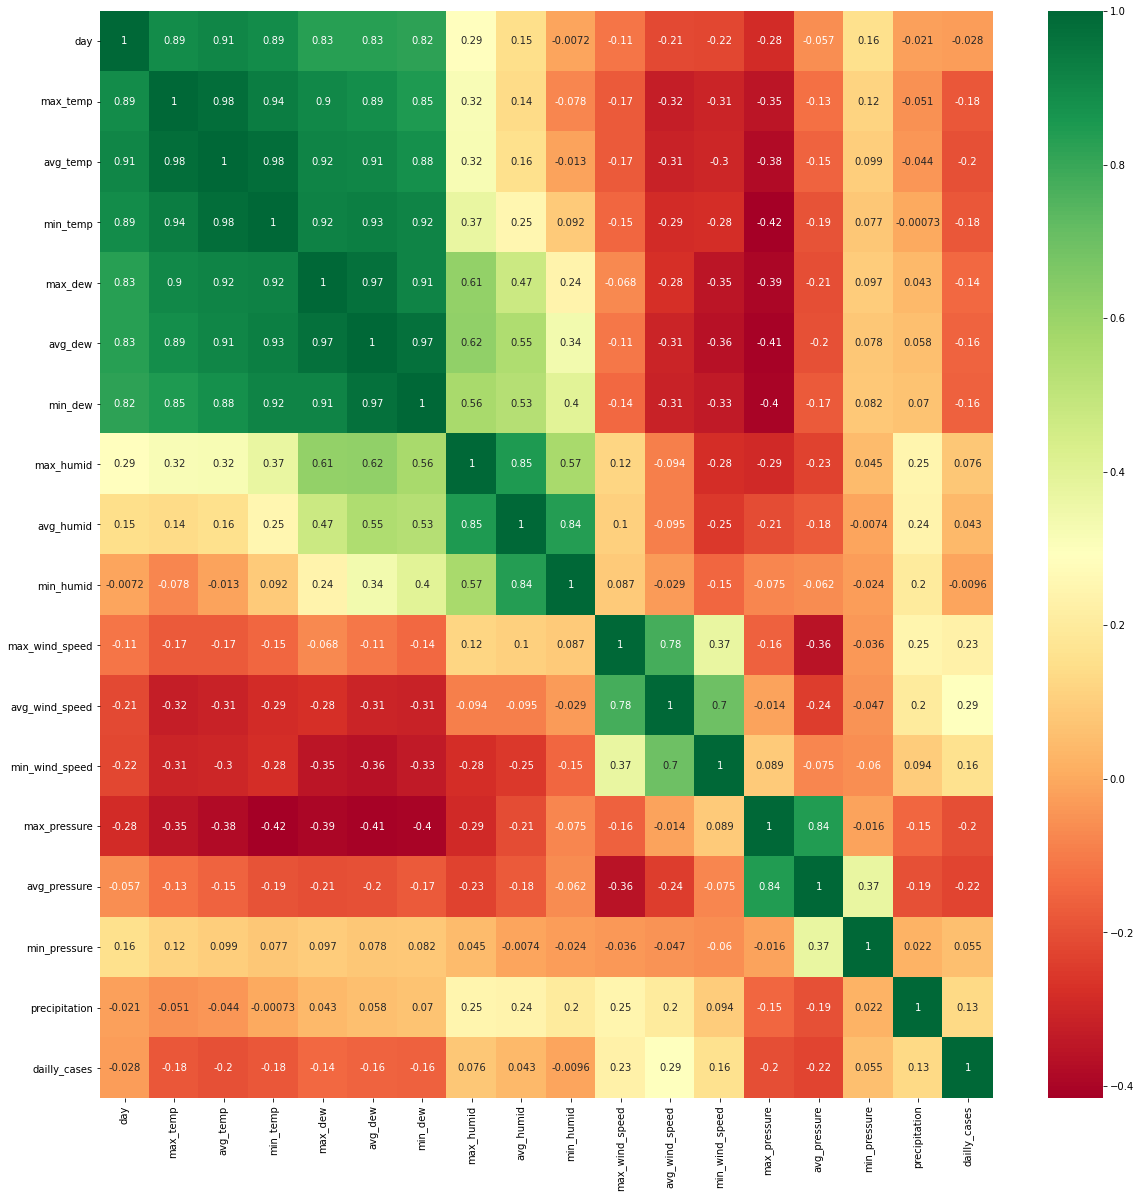

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df4[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('Heatmap.png')

In [43]:
def makePrediction(svrModelIncreasing, svrModelDecreasing, svrModelConstant, svrModelCombinedData, dataColumns, test_feature):    
    dataList = {}
    for data in dataColumns:
        dataList[data] = test_feature[data]
        
    newDataFrame = pd.DataFrame(dataList, index = [0])
    resultIncreasingModel = svrModelIncreasing.predict(newDataFrame)
    resultDecreasingModel = svrModelDecreasing.predict(newDataFrame)
    resultConstantModel = svrModelConstant.predict(newDataFrame)
    
    combinedAraay = [[resultIncreasingModel, resultDecreasingModel, resultConstantModel]]
    
    dataFrameForPrediction = pd.DataFrame(combinedAraay, columns=['increasingModelPrediction', 'decreasingModelPrediction', 'constantModelPrediction'])
    result = svrModelCombinedData.predict(dataFrameForPrediction)
    return math.floor(result[0])

def predict_COVID_part2(pastCases, train_df, train_labels_df, test_feature):
    numberOFDaysToStartFrom = 50

    df2 = train_df[['dailly_cases']]

    casesCol = 'dailly_cases'
    casesList = []
    pastCase = pastCases
    for index in range(1, pastCase + 1):
        newColName = casesCol + '-' + str(index)
        casesList.append(newColName)
        df2[newColName] = np.nan
        for rowInd in range(numberOFDaysToStartFrom, len(df2)):
            df2.loc[rowInd, newColName] = int(df2.loc[rowInd - index, casesCol])
        
    dataFrameIncreasing = df2[numberOFDaysToStartFrom:80]
    dataFrameDecreasing = df2[81:137]
    dataFrameConstant = df2[138:]        

    svrModelIncreasing = SVR()
    svrModelDecreasing = SVR()
    svrModelConstant = SVR()

    svrModelIncreasing.set_params(**{'kernel': 'rbf', 'degree': 1, 'C': 9500,
                            'gamma': 'scale', 'coef0': 0.0, 'tol': 0.001, 'epsilon': 110})

    svrModelDecreasing.set_params(**{'kernel': 'rbf', 'degree': 1, 'C': 9500,
                            'gamma': 'scale', 'coef0': 0.0, 'tol': 0.001, 'epsilon': 110})

    svrModelConstant.set_params(**{'kernel': 'rbf', 'degree': 1, 'C': 9500,
                            'gamma': 'scale', 'coef0': 0.0, 'tol': 0.001, 'epsilon': 110})


    xTrainIncreasing = dataFrameIncreasing.drop(['dailly_cases'], 1)
    yTrainIncreasing = train_labels_df.iloc[numberOFDaysToStartFrom:80]
    yTrainIncreasing = yTrainIncreasing.drop(['day'], 1)

    xTrainDecreasing = dataFrameDecreasing.drop(['dailly_cases'], 1)
    yTrainDecreasing = train_labels_df.iloc[81:137]
    yTrainDecreasing = yTrainDecreasing.drop(['day'], 1)

    xTrainConstant = dataFrameConstant.drop(['dailly_cases'], 1)
    yTrainConstant = train_labels_df.iloc[138:]
    yTrainConstant = yTrainConstant.drop(['day'], 1)

    svrModelIncreasing.fit(xTrainIncreasing, yTrainIncreasing)

    svrModelDecreasing.fit(xTrainDecreasing, yTrainDecreasing)

    svrModelConstant.fit(xTrainConstant, yTrainConstant)

    testingForSeperateModels = df2.drop(['dailly_cases'], 1)
    testingForSeperateModels = testingForSeperateModels[numberOFDaysToStartFrom:]


    increasingModelPrediction = svrModelIncreasing.predict(testingForSeperateModels)
    decreasingModelPrediction = svrModelDecreasing.predict(testingForSeperateModels)
    constantModelPrediction = svrModelConstant.predict(testingForSeperateModels)

    combinedData = []
    for index in range(len(increasingModelPrediction)):
        newArray = []
        newArray.append(math.floor(increasingModelPrediction[index]))
        newArray.append(math.floor(decreasingModelPrediction[index]))
        newArray.append(math.floor(constantModelPrediction[index]))
        combinedData.append(newArray)

    xTrainCombinedModel = pd.DataFrame(combinedData, columns=['increasingModelPrediction', 'decreasingModelPrediction', 'constantModelPrediction'])
    yTrainCombinedModel =  train_labels_df.iloc[numberOFDaysToStartFrom:]
    yTrainCombinedModel = yTrainCombinedModel.drop(['day'], 1)

    svrModelCombined = SVR()

    svrModelCombined.set_params(**{'kernel': 'rbf', 'degree': 1, 'C': 9500,
                            'gamma': 'scale', 'coef0': 0.0, 'tol': 0.001, 'epsilon': 110})

    svrModelCombined.fit(xTrainCombinedModel, yTrainCombinedModel)

    dataColumns = casesList
    
    finalPrediction = makePrediction(svrModelIncreasing, svrModelDecreasing, svrModelConstant, svrModelCombined, dataColumns, test_feature)
    
    return finalPrediction

In [44]:
import submission
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error



## Read training data
train_file = './data/COVID_train_data.csv'
train_df = pd.read_csv(train_file)

## Read Training labels
train_label_file = './data/COVID_train_labels.csv'
train_labels_df = pd.read_csv(train_label_file)


## Read testing Features
test_fea_file = './data/test_features.csv'
test_features = pd.read_csv(test_fea_file)


## Generate Prediction Results
predicted_cases_part2 = []
for pastCases in range(1, 31):
    predictedArray = []
    for idx in range(len(test_features)):
        test_feature = test_features.loc[idx]
        prediction = predict_COVID_part2(pastCases, train_df, train_labels_df, test_feature)
        predictedArray.append(prediction)
    predicted_cases_part2.append(predictedArray)
    
print(predicted_cases_part2)

<ipython-input-43-17a23a2d2d63>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[newColName] = np.nan
/Users/arthpatel/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/arthpatel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(

[[1006, 924, 730, 957, 951, 844, 1079, 921, 900, 733, 919, 909, 796, 981, 981, 887, 774, 872, 940, 878], [1100, 914, 759, 872, 973, 945, 1072, 900, 971, 739, 834, 976, 843, 952, 960, 927, 776, 807, 957, 971], [1080, 870, 854, 793, 845, 937, 1104, 909, 986, 778, 727, 783, 834, 892, 1016, 925, 840, 733, 855, 907], [1021, 953, 849, 864, 850, 923, 1068, 948, 993, 749, 877, 811, 934, 1014, 996, 1002, 853, 786, 916, 1014], [1032, 930, 872, 874, 817, 972, 1040, 927, 999, 779, 854, 800, 948, 993, 968, 961, 850, 814, 852, 962], [851, 922, 814, 911, 894, 946, 1099, 746, 956, 795, 816, 907, 860, 1029, 815, 874, 847, 791, 899, 965], [897, 869, 862, 887, 890, 1008, 1016, 823, 839, 845, 846, 854, 956, 934, 845, 798, 839, 812, 830, 946], [883, 879, 869, 883, 911, 1003, 996, 812, 844, 849, 852, 861, 939, 923, 838, 792, 838, 821, 837, 936], [880, 901, 875, 906, 873, 1017, 1003, 808, 853, 847, 885, 843, 930, 940, 817, 827, 851, 850, 834, 930], [900, 874, 889, 905, 883, 1002, 1026, 823, 826, 855, 888, 86

/Users/arthpatel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/arthpatel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/arthpatel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/arthpatel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

## Error Computation
We compare the prediction results for each day against the ground truth values to compute the absolute error of each day. Later, we compute the mean over all the absolute error terms corresponding to the `test_interval` to compute the `MAE`.


In [50]:
## MeanAbsoluteError Computation...!

test_label_file ='./data/COVID_test_labels.csv'
test_labels_df = pd.read_csv(test_label_file)
ground_truth = test_labels_df['dailly_cases'].to_list()

MAEArray = []
y = []
for index in range(len(predicted_cases_part2)):
    MeanAbsError = mean_absolute_error(predicted_cases_part2[index], ground_truth)
    MAEArray.append(MeanAbsError)
    y.append(index + 1)
    print('MeanAbsError for days = ', index + 1, ' is ', MeanAbsError)
    

MeanAbsError for days =  1  is  133.25
MeanAbsError for days =  2  is  142.15
MeanAbsError for days =  3  is  133.95
MeanAbsError for days =  4  is  114.6
MeanAbsError for days =  5  is  102.15
MeanAbsError for days =  6  is  115.1
MeanAbsError for days =  7  is  77.85
MeanAbsError for days =  8  is  81.05
MeanAbsError for days =  9  is  77.55
MeanAbsError for days =  10  is  72.2
MeanAbsError for days =  11  is  70.05
MeanAbsError for days =  12  is  73.55
MeanAbsError for days =  13  is  73.1
MeanAbsError for days =  14  is  68.7
MeanAbsError for days =  15  is  65.85
MeanAbsError for days =  16  is  64.65
MeanAbsError for days =  17  is  65.65
MeanAbsError for days =  18  is  65.9
MeanAbsError for days =  19  is  66.2
MeanAbsError for days =  20  is  68.15
MeanAbsError for days =  21  is  73.1
MeanAbsError for days =  22  is  71.25
MeanAbsError for days =  23  is  73.3
MeanAbsError for days =  24  is  79.45
MeanAbsError for days =  25  is  75.7
MeanAbsError for days =  26  is  78.85

Text(0, 0.5, 'MAE')

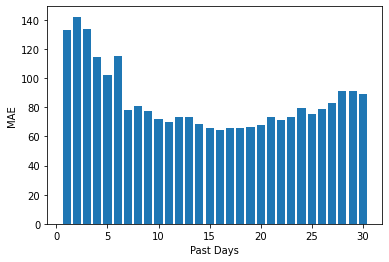

In [55]:
plt.bar(y, MAEArray)
plt.xlabel('Past Days')
# naming the y-axis
plt.ylabel('MAE')

### Evaluation


Your implementation will be tested using multiple different training and test data sets. 

1. For the `project-part1`, we test the correctness of implementation. For a given set of input parameters, you are required to correctly compute the feature vectors and generate the results for the predicted COVID-19 cases.


<center>$
score_{part1} =  \begin{cases}
    \sum_{i=1}^{3}15; & \text{if}\;\; \text{Correctly implemented}\\
    0,              & \text{otherwise}
\end{cases} $</center>

* For the `project-part2`, we will test your implementation in terms of performance improvement compared to the project-part1. We will be using the following linear function to assign scores:


<center>$
score_{part2} = \begin{cases}
    \text{math.floor}(-1.32 * MAE_{avg} + 125.52) &; \text{if} \;\; 61.0 \leq MAE_{avg} \leq 95.0\\
    45 &; \text{if} \;\; MAE_{avg} < 61.0
\end{cases} $</center>

where $MAE_{avg}$ is the average of the mean-absolute values over $N$ different test data sets, as shown below.

<center>$MAE_{avg} = \frac{1}{N}\sum_{i=1}^{N}MAE_{i}$</center>

**NOTE: For the project part-2, we will be using the same training data as provided along with the specs (i.e., `train_df`)**.

## BONUS Points 

We will be awarding BONUS scores to top-20 students with best scores for the part-2. The bonus scores will be awarded in decreasing order of the performance.

* The best performing student will be awarded `10 points`.
* Second best performing student will be awarded `9.5 points`.
* Third best performing student will be awarded `9 points` and so on.

## Project Submission and Feedback

For project submission and feedback, you are required to submit the following files:

1. Your implementation in a python file `submission.py`.

2. A report `Project.pdf` (**10 points**). You need to write a concise and simple report illustrating:
    - Implementation details of part 1.
    - Implementation details of part 2. Especially, it should include:
        * Comprehensive feature analysis, i.e., which features were used to boost the performance of part 2 compared with part 1, why?
        * What additional techniques were used to augment the performance of the model compared to part1?


**Note:** 
1. Every student will be entitled to **15 Feedback Attempts** (use them wisely), we will use the last submission for final evaluation.
* We will not provide any feedback for the project-part2.
* It is mandatory for the students to submit the report along with the last submission. 
* **The students failing to submit the report will be penalized by 10 points.**